# **Codig Dojo**: Reto banco del pacífico
## Creado por: Alejandro Acosta

- Fecha de creación: 2022-01-19
- Fecha de modificación: 2022-01-19
- Descripción: Reto banco del pacífico

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importación de datos y union de las bases

In [123]:
file = './Reto/Data_Banco.xlsx'

df = pd.read_excel(file, sheet_name='Data')
print(df.shape)
sucursal = pd.read_excel(file, sheet_name='Data_Sucursal').rename(
    columns={'ID_Sucursal': 'Sucursal', 'Sucursal': 'Nombre_Sucursal'})
print(sucursal.shape)

cajeros = pd.read_excel(file, sheet_name='Data_Cajero')
print(cajeros.shape)

df = df.merge(cajeros, how='left', on='Cajero').merge(
    sucursal, how='left', on='Sucursal')
print(df.shape)


(24299, 7)
(5, 3)
(27, 5)
(24299, 13)


## Limpieza datos

In [124]:
print('Proporción datos Vacios')
df.isna().sum()/df.shape[0]

Proporción datos Vacios


Sucursal               0.0
Cajero                 0.0
ID_Transaccion         0.0
Transaccion            0.0
Tiempo_Servicio_seg    0.0
Satisfaccion           0.0
Monto                  0.0
Edad                   0.0
Sexo                   0.0
Nivel_Formacion        0.0
Anio Ingreso           0.0
Nombre_Sucursal        0.0
Nuevo_Sistema          0.0
dtype: float64

In [125]:
df.head()

,Sucursal,Cajero,ID_Transaccion,Transaccion,Tiempo_Servicio_seg,Satisfaccion,Monto,Edad,Sexo,Nivel_Formacion,Anio Ingreso,Nombre_Sucursal,Nuevo_Sistema
0,62,4820,2,Cobro/Pago (Cta externa),311.0,Muy Bueno,"2889,3",42,F,Bachiller,1995,Riocentro Sur,No
1,62,4820,2,Cobro/Pago (Cta externa),156.0,Malo,"1670,69",42,F,Bachiller,1995,Riocentro Sur,No
2,62,4820,2,Cobro/Pago (Cta externa),248.0,Regular,"3172,49",42,F,Bachiller,1995,Riocentro Sur,No
3,62,4820,2,Cobro/Pago (Cta externa),99.0,Regular,1764.92,42,F,Bachiller,1995,Riocentro Sur,No
4,62,4820,2,Cobro/Pago (Cta externa),123.0,Muy Bueno,1835.69,42,F,Bachiller,1995,Riocentro Sur,No


In [126]:
df.dtypes

Sucursal                 int64
Cajero                   int64
ID_Transaccion           int64
Transaccion             object
Tiempo_Servicio_seg    float64
Satisfaccion            object
Monto                   object
Edad                     int64
Sexo                    object
Nivel_Formacion         object
Anio Ingreso             int64
Nombre_Sucursal         object
Nuevo_Sistema           object
dtype: object

In [127]:
df['Monto'] = df.Monto.apply(lambda x: str(x).replace(',','.'))
df['Monto'] = df.Monto.astype(float)

In [128]:
n_transacciones = df.shape[0]
print(f'Se han realizado: {n_transacciones} transacciones en la semana')

Se han realizado: 24299 transacciones en la semana


In [129]:
n_cajeros = len(df.Cajero.unique())
print(f'Se han evaluado a: {n_cajeros} cajeros')

Se han evaluado a: 27 cajeros


In [130]:
n_sucursales = len(df.Cajero.unique())
print(f'Se han evaluado a: {n_sucursales} sucursales')

Se han evaluado a: 27 sucursales


In [131]:
df.head()

,Sucursal,Cajero,ID_Transaccion,Transaccion,Tiempo_Servicio_seg,Satisfaccion,Monto,Edad,Sexo,Nivel_Formacion,Anio Ingreso,Nombre_Sucursal,Nuevo_Sistema
0,62,4820,2,Cobro/Pago (Cta externa),311.0,Muy Bueno,2889.30,42,F,Bachiller,1995,Riocentro Sur,No
1,62,4820,2,Cobro/Pago (Cta externa),156.0,Malo,1670.69,42,F,Bachiller,1995,Riocentro Sur,No
2,62,4820,2,Cobro/Pago (Cta externa),248.0,Regular,3172.49,42,F,Bachiller,1995,Riocentro Sur,No
3,62,4820,2,Cobro/Pago (Cta externa),99.0,Regular,1764.92,42,F,Bachiller,1995,Riocentro Sur,No
4,62,4820,2,Cobro/Pago (Cta externa),123.0,Muy Bueno,1835.69,42,F,Bachiller,1995,Riocentro Sur,No


In [93]:
tiempo_promedio = np.round(df.Tiempo_Servicio_seg.mean(),2)
print(f'El tiempo promedio de atención al cliente es: {tiempo_promedio} segundos')

El tiempo promedio de atención al cliente es: 155.58 segundos


In [133]:
df2 = df.groupby('Sucursal').aggregate({'Monto':np.sum,'Tiempo_Servicio_seg':np.sum})
df2['usd/seg'] = df2.Monto/df2.Tiempo_Servicio_seg

df2

,Monto,Tiempo_Servicio_seg,usd/seg
Sucursal,,,
62,4990026.52,2.536960e+05,19.669315
85,24670194.61,2.004067e+06,12.310065
267,6869577.52,6.079658e+05,11.299284
443,8710626.69,7.584385e+05,11.484948
586,3264172.92,1.562710e+05,20.887899


In [132]:
mejor_sucursal = df2['usd/seg'].nlargest(1).index[0]
print(f'La mejor sucursal en términos de dólares por segundo es: {mejor_sucursal}')

La mejor sucursal en términos de dólares por segundo es: 586


<AxesSubplot:xlabel='Sucursal', ylabel='Tiempo_Servicio_seg'>

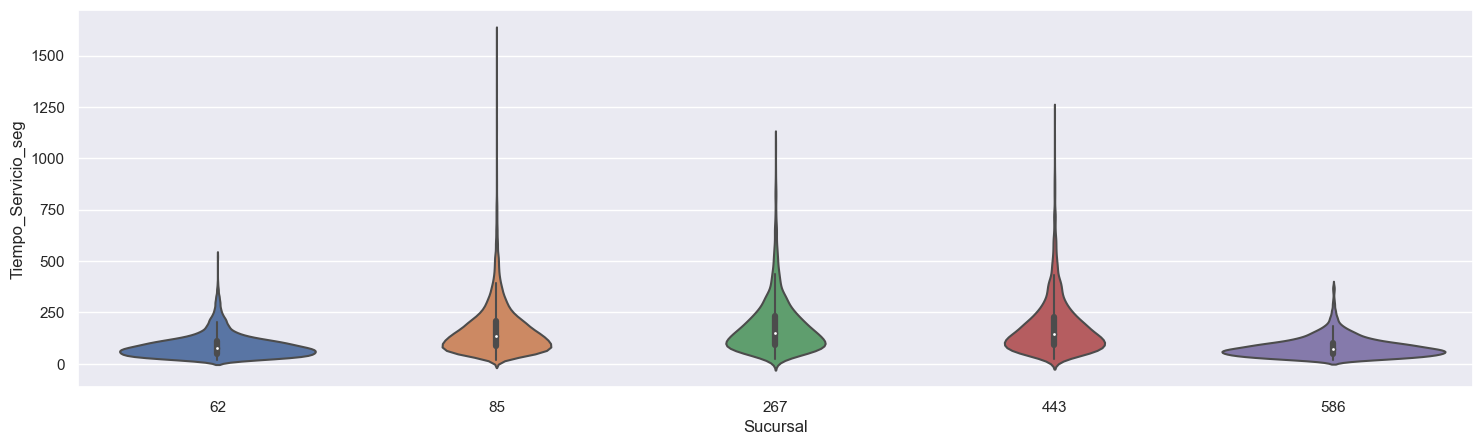

In [112]:
plt.figure(figsize=(18,5), dpi=100)
sns.violinplot(data=df, x='Sucursal', y='Tiempo_Servicio_seg')

Adicionalmente, al considerar solo los tiempos de atención, la sucursal 586 tiene un promedio menor y menos dispersión